### 导入需要的库

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torchvision import transforms
from tqdm import *
import matplotlib.pyplot as plt
import copy
from torch.autograd.gradcheck import zero_gradients

### 建立目标模型

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### 加载数据集
* 对数据集进行处理时，当官方提供的方法并不能够满足你的需要，这时候你就需要自定义自己的transform策略方法就是使用transforms.Lambda。

In [3]:
# 定义数据转换格式
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x : x.resize_(28*28))])
# 导入数据，定义数据接口
traindata = torchvision.datasets.MNIST(root="./mnist", train=True, download=True, transform=mnist_transform)
testdata  = torchvision.datasets.MNIST(root="./mnist", train=False, download=True, transform=mnist_transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=256, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testdata, batch_size=256, shuffle=True, num_workers=0)

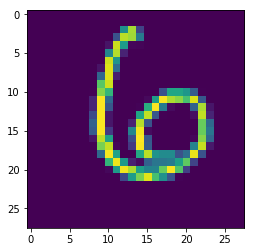

In [62]:
# 展示图片
index = 100
image = testdata[index][0]
label = testdata[index][1]
image.resize_(28,28)
img = transforms.ToPILImage()(image)
plt.imshow(img)

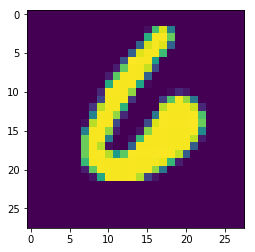

In [63]:
# 展示图片
index = 100
batch = iter(testloader).next() #将testloader转换为迭代器
image = batch[0][index]
label = batch[1][index]
image.resize_(28,28)
img = transforms.ToPILImage()(image)
plt.imshow(img)

### 初始化模型、选择代价函数及优化器

In [4]:
net = Net()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-04)

### 训练分类模型

In [75]:
num_epoch = 50  
for epoch in tqdm(range(num_epoch)):
    losses = 0.0
    for data in trainloader:
        inputs, labels = data
        #inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        losses += loss.data.item()
    print("*****************当前平均损失为{}*****************".format(losses/2000.0))



  0%|                                        | 0/50 [00:00<?, ?it/s]

*****************当前平均损失为0.04165983649343252*****************




  2%|▋                               | 1/50 [00:17<14:38, 17.92s/it]

*****************当前平均损失为0.040492160968482495*****************




  4%|█▎                              | 2/50 [00:36<14:23, 17.99s/it]

*****************当前平均损失为0.039521223597228525*****************




  6%|█▉                              | 3/50 [00:54<14:10, 18.09s/it]

*****************当前平均损失为0.03851877588778734*****************




  8%|██▌                             | 4/50 [01:12<13:48, 18.02s/it]

*****************当前平均损失为0.037725006766617296*****************




 10%|███▏                            | 5/50 [01:30<13:36, 18.15s/it]

*****************当前平均损失为0.03685885255783796*****************




 12%|███▊                            | 6/50 [01:49<13:23, 18.27s/it]

*****************当前平均损失为0.03617659279704094*****************




 14%|████▍                           | 7/50 [02:08<13:13, 18.45s/it]

*****************当前平均损失为0.035506266839802264*****************




 16%|█████                           | 8/50 [02:26<12:55, 18.46s/it]

*****************当前平均损失为0.03485239341855049*****************




 18%|█████▊                          | 9/50 [02:45<12:40, 18.56s/it]

*****************当前平均损失为0.034249214999377726*****************




 20%|██████▏                        | 10/50 [03:04<12:27, 18.69s/it]

*****************当前平均损失为0.03358484707772732*****************




 22%|██████▊                        | 11/50 [03:22<12:07, 18.66s/it]

*****************当前平均损失为0.03300699384510517*****************




 24%|███████▍                       | 12/50 [03:41<11:48, 18.66s/it]

*****************当前平均损失为0.032512290135025976*****************




 26%|████████                       | 13/50 [04:00<11:30, 18.66s/it]

*****************当前平均损失为0.031885896138846875*****************




 28%|████████▋                      | 14/50 [04:19<11:12, 18.69s/it]

*****************当前平均损失为0.031341809779405594*****************




 30%|█████████▎                     | 15/50 [04:37<10:52, 18.65s/it]

*****************当前平均损失为0.030828842803835868*****************




 32%|█████████▉                     | 16/50 [04:56<10:31, 18.59s/it]

*****************当前平均损失为0.03038237453252077*****************




 34%|██████████▌                    | 17/50 [05:14<10:14, 18.61s/it]

*****************当前平均损失为0.029894930675625802*****************




 36%|███████████▏                   | 18/50 [05:31<09:40, 18.15s/it]

*****************当前平均损失为0.029401722706854344*****************




 38%|███████████▊                   | 19/50 [05:48<09:07, 17.65s/it]

*****************当前平均损失为0.028962727040052413*****************




 40%|████████████▍                  | 20/50 [06:07<09:01, 18.03s/it]

*****************当前平均损失为0.028486435778439043*****************




 42%|█████████████                  | 21/50 [06:26<08:57, 18.53s/it]

*****************当前平均损失为0.028019602254033087*****************




 44%|█████████████▋                 | 22/50 [06:46<08:47, 18.84s/it]

*****************当前平均损失为0.02763336029648781*****************




 46%|██████████████▎                | 23/50 [07:06<08:39, 19.24s/it]

*****************当前平均损失为0.027186830043792725*****************




 48%|██████████████▉                | 24/50 [07:26<08:27, 19.53s/it]

*****************当前平均损失为0.02676933743059635*****************




 50%|███████████████▌               | 25/50 [07:46<08:10, 19.62s/it]

*****************当前平均损失为0.026346015207469462*****************




 52%|████████████████               | 26/50 [08:06<07:52, 19.69s/it]

*****************当前平均损失为0.025990711648017167*****************




 54%|████████████████▋              | 27/50 [08:23<07:16, 18.98s/it]

*****************当前平均损失为0.025532921008765697*****************




 56%|█████████████████▎             | 28/50 [08:41<06:48, 18.56s/it]

*****************当前平均损失为0.025213239818811416*****************




 58%|█████████████████▉             | 29/50 [08:57<06:16, 17.93s/it]

*****************当前平均损失为0.02478914751857519*****************




 60%|██████████████████▌            | 30/50 [09:14<05:52, 17.63s/it]

*****************当前平均损失为0.024460068117827177*****************




 62%|███████████████████▏           | 31/50 [09:32<05:36, 17.72s/it]

*****************当前平均损失为0.024050110414624213*****************




 64%|███████████████████▊           | 32/50 [09:50<05:21, 17.83s/it]

*****************当前平均损失为0.02371783949434757*****************




 66%|████████████████████▍          | 33/50 [10:08<05:04, 17.89s/it]

*****************当前平均损失为0.023328175347298384*****************




 68%|█████████████████████          | 34/50 [10:27<04:48, 18.05s/it]

*****************当前平均损失为0.02303036541491747*****************




 70%|█████████████████████▋         | 35/50 [10:46<04:34, 18.28s/it]

*****************当前平均损失为0.022676028694957495*****************




 72%|██████████████████████▎        | 36/50 [11:05<04:18, 18.48s/it]

*****************当前平均损失为0.022351771280169488*****************




 74%|██████████████████████▉        | 37/50 [11:23<04:00, 18.50s/it]

*****************当前平均损失为0.0220575595498085*****************




 76%|███████████████████████▌       | 38/50 [11:39<03:31, 17.60s/it]

*****************当前平均损失为0.02174130654335022*****************




 78%|████████████████████████▏      | 39/50 [11:52<03:00, 16.36s/it]

*****************当前平均损失为0.021417876034975053*****************




 80%|████████████████████████▊      | 40/50 [12:10<02:47, 16.71s/it]

*****************当前平均损失为0.021114801045507194*****************




 82%|█████████████████████████▍     | 41/50 [12:27<02:32, 16.91s/it]

*****************当前平均损失为0.020807139325886966*****************




 84%|██████████████████████████     | 42/50 [12:45<02:17, 17.18s/it]

*****************当前平均损失为0.020538226917386056*****************




 86%|██████████████████████████▋    | 43/50 [13:02<02:00, 17.19s/it]

*****************当前平均损失为0.02025336992368102*****************




 88%|███████████████████████████▎   | 44/50 [13:20<01:44, 17.50s/it]

*****************当前平均损失为0.019995070610195398*****************




 90%|███████████████████████████▉   | 45/50 [13:38<01:28, 17.63s/it]

*****************当前平均损失为0.01966900209337473*****************




 92%|████████████████████████████▌  | 46/50 [13:55<01:10, 17.53s/it]

*****************当前平均损失为0.019448834951967*****************




 94%|█████████████████████████████▏ | 47/50 [14:13<00:52, 17.49s/it]

*****************当前平均损失为0.019166530340909958*****************




 96%|█████████████████████████████▊ | 48/50 [14:29<00:34, 17.02s/it]

*****************当前平均损失为0.01890932559221983*****************




 98%|██████████████████████████████▍| 49/50 [14:44<00:16, 16.53s/it]

*****************当前平均损失为0.01866672583296895*****************




100%|███████████████████████████████| 50/50 [15:54<00:00, 32.59s/it]



### 测试模型拟合效果

In [88]:
correct = 0
total = 0 
for data in testloader:
    images, labels = data 
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0) 
    correct += (predicted == labels).sum()
print("预测准确率为：{}/{}".format(correct, total))

预测准确率为：9524/10000


### 保存和加载模型

In [ ]:
# 保存整个网络
torch.save(net, 'mnist_net_all.pkl') 
# 保存网络中的参数, 速度快，占空间少
torch.save(net.state_dict(),'mnist_net_param.pkl')
#针对上面一般的保存方法，加载的方法分别是：
#model_dict=torch.load(PATH)
#model_dict=model.load_state_dict(torch.load(PATH))

预测值为：6


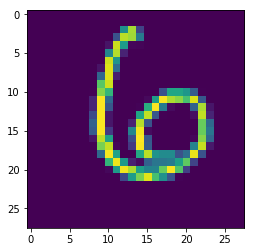

In [41]:
net = torch.load('mnist_net_all.pkl') # 加载模型

index = 100 # 选择测试样本
image = testdata[index][0]
label = testdata[index][1]

outputs = net(Variable(image))
predicted = torch.max(outputs.data,0)[1]
print('预测值为：{}'.format(predicted))

image.resize_(28,28)
img = transforms.ToPILImage()(image)
plt.imshow(img)

### FGSM对抗样本

预测值为：2


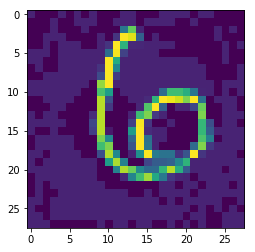

In [47]:
index = 100 # 选择测试样本
image = Variable(testdata[index][0].resize_(1,784), requires_grad=True)
label = torch.tensor([testdata[index][1]])
outputs = net(image)
loss = loss_function(outputs, label)
loss.backward()

# FGSM添加扰动
epsilon = 0.1 # 扰动程度
x_grad = torch.sign(image.grad.data)
x_adversarial = torch.clamp(image.data + epsilon * x_grad, 0, 1) 

# 使用之前建立的模型对扰动后的图片数据进行分类
outputs = net(x_adversarial)
predicted = torch.max(outputs.data,1)[1] #outputs含有梯度值，其处理方式与之前有所不同
print('预测值为：{}'.format(predicted[0]))

# 展示扰动之后的图片
x_adversarial.resize_(28,28)
img = transforms.ToPILImage()(x_adversarial)
plt.imshow(img)

### Deepfool对抗样本

In [29]:
net = torch.load('mnist_net_all.pkl') # 加载模型
index = 12 # 选择测试样本
image = Variable(testdata[index][0].resize_(1,784), requires_grad=True)
label = torch.tensor([testdata[index][1]])

In [30]:
f_image = net.forward(image).data.numpy().flatten()
I = (np.array(f_image)).flatten().argsort()[::-1]
label = I[0]

input_shape = image.data.numpy().shape
pert_image = copy.deepcopy(image)
w = np.zeros(input_shape)
r_tot = np.zeros(input_shape)

loop_i = 0
max_iter = 50
overshoot = 0.0

x = Variable(pert_image, requires_grad=True)
fs = net.forward(x)
fs_list = [fs[0][I[k]] for k in range(len(I))]
k_i = label

In [32]:
while k_i == label and loop_i < max_iter:
    pert = np.inf
    fs[0][I[0]].backward(retain_graph=True)
    orig_grad = x.grad.data.numpy().copy()
    
    for k in range(len(I)):
        zero_gradients(x)
        fs[0][I[k]].backward(retain_graph=True)
        cur_grad = x.grad.data.numpy().copy()
        
        w_k = cur_grad - orig_grad
        f_k = (fs[0][I[k]] - fs[0][I[0]]).data.numpy()
        
        pert_k = abs(f_k) / np.linalg.norm(w_k.flatten())
        if pert_k < pert:
            pert = pert_k
            w = w_k
    r_i = (pert + 1e-4) * w / np.linalg.norm(w)
    r_tot = np.float32(r_tot + r_i)
    
    pert_image = image + (1+overshoot)*torch.from_numpy(r_tot)
    x = Variable(pert_image, requires_grad=True)
    fs = net.forward(x)
    k_i = np.argmax(fs.data.numpy().flatten())
    loop_i += 1
r_tot = (1+overshoot)*r_tot

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in float_scalars
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


预测值为：4


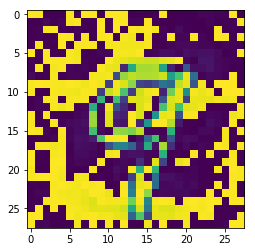

In [33]:
outputs = net(pert_image.data.resize_(1,784))
predicted = torch.max(outputs.data,1)[1] #outputs含有梯度值，其处理方式与之前有所不同
print('预测值为：{}'.format(predicted[0]))

pert_image.data.resize_(28,28)
img = transforms.ToPILImage()(pert_image)
plt.imshow(img)
